In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [57]:
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [58]:
# Convert date safely
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True, errors='coerce')

# Create YearFrac column
df['YearFrac'] = df['Formatted Date'].dt.year + (df['Formatted Date'].dt.dayofyear / 365)

# Drop rows with missing Temperature or YearFrac
df = df.dropna(subset=['Temperature (C)', 'YearFrac'])

# Define X and y
X_vals = df['YearFrac'].values.reshape(-1, 1)
data = df['Temperature (C)'].values

In [59]:
# ---- Linear Regression ----
lin_model = LinearRegression()
lin_model.fit(X_vals, data)
linear_pred = lin_model.predict(X_vals)

# ---- Polynomial Regression (Degree 2) ----
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly2.fit_transform(X_vals)
poly2_model = LinearRegression()
poly2_model.fit(X_poly2, data)
poly2_pred = poly2_model.predict(X_poly2)


In [60]:
# ---- Autocorrelation ----
N = len(data)
lags = range(35)
autocorr_values = []
mean_data = np.mean(data)
variance_data = np.var(data)

In [61]:
for lag in lags:
    if lag == 0:
        autocorr_values.append(1)
    else:
        auto_cov = np.sum((data[:-lag] - mean_data) * (data[lag:] - mean_data)) / N
        autocorr_values.append(auto_cov / variance_data)

C:\Users\admin\AppData\Local\Temp\ipykernel_20420\737742966.py:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, autocorr_values, use_line_collection=True)


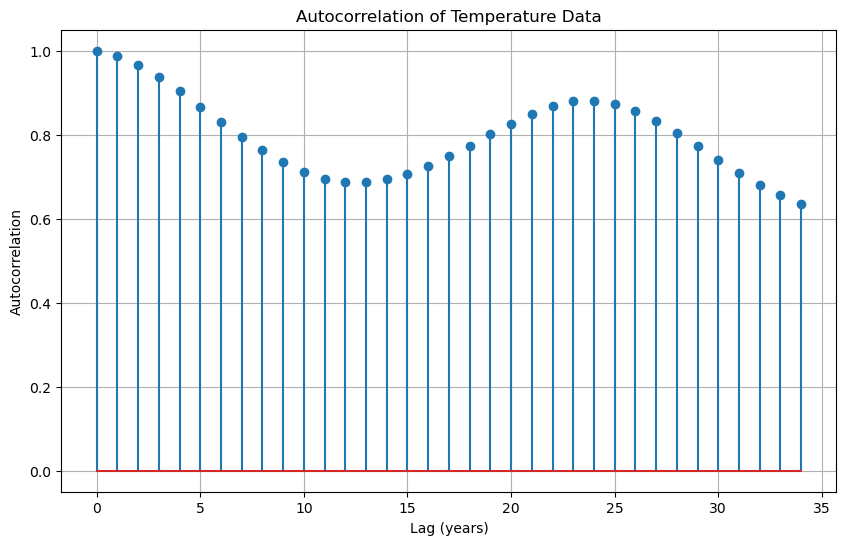

In [62]:
plt.figure(figsize=(10, 6))
plt.stem(lags, autocorr_values, use_line_collection=True)
plt.title("Autocorrelation of Temperature Data")
plt.xlabel("Lag (years)")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

In [63]:
print("Lag\tAutocorrelation")
for lag, val in zip(lags, autocorr_values):
    print(f"{lag}\t{val:.4f}")

Lag	Autocorrelation
0	1.0000
1	0.9867
2	0.9655
3	0.9369
4	0.9032
5	0.8670
6	0.8304
7	0.7951
8	0.7626
9	0.7343
10	0.7115
11	0.6954
12	0.6870
13	0.6865
14	0.6935
15	0.7071
16	0.7259
17	0.7488
18	0.7743
19	0.8008
20	0.8265
21	0.8497
22	0.8680
23	0.8792
24	0.8809
25	0.8736
26	0.8568
27	0.8329
28	0.8042
29	0.7727
30	0.7405
31	0.7093
32	0.6806
33	0.6558
34	0.6361
